In [2]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [9]:
from tqdm import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode ="grayscale" )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [11]:
train_features = extract_features(train['image'])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28821/28821 [02:01<00:00, 237.43it/s]


In [12]:
test_features = extract_features(test['image'])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7066/7066 [00:29<00:00, 238.01it/s]


In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train =le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
  
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
   
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
  
model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\Mohit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
history = model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 143s 622ms/step - accuracy: 0.2315 - loss: 1.8383 - val_accuracy: 0.2583 - val_loss: 1.8061
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 145s 640ms/step - accuracy: 0.2522 - loss: 1.8001 - val_accuracy: 0.2944 - val_loss: 1.7253
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 152s 673ms/step - accuracy: 0.2934 - loss: 1.7213 - val_accuracy: 0.4062 - val_loss: 1.5569
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 146s 644ms/step - accuracy: 0.3735 - loss: 1.5953 - val_accuracy: 0.4604 - val_loss: 1.4145
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 142s 627ms/step - accuracy: 0.4230 - loss: 1.4896 - val_accuracy: 0.4762 - val_loss: 1.3571
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 142s 630ms/step - accuracy: 0.4441 - loss: 1.4378 - val_accuracy: 0.4963 - val_loss: 1.3148
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 141s 624ms/step - accuracy: 0.4667 - loss: 1.3858 - val_accuracy: 0.5016 - val_loss: 1.2846
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 141s 625ms/step - accuracy: 

In [29]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [30]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [31]:
def ef(image):
    img = load_img(image,color_mode = "grayscale")
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

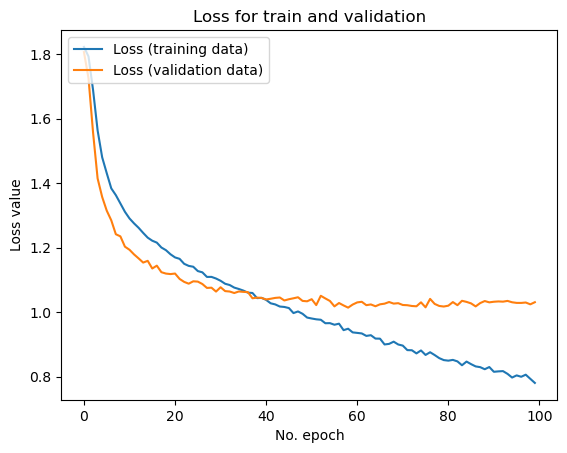

In [33]:
plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss for train and validation')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

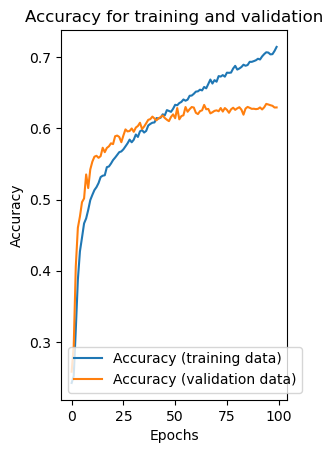

In [34]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Accuracy for training and validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
image = 'images/train/sad/42.jpg'
print("original image is angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is",pred_label)

original image is angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
model prediction is sad


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
model prediction is sad


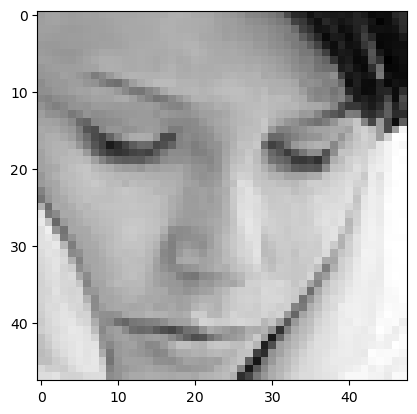

In [40]:
image = 'images/train/sad/42.jpg'
print("original image is sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap = 'gray')

In [42]:
image = 'images/train/sad/20.jpg'
print("original image is disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap = 'gray')

original image is disgust


FileNotFoundError: [Errno 2] No such file or directory: 'images/train/sad/20.jpg'